In [1]:
import context
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import linregress
from collections import namedtuple
from numlabs.lab4.lab4_functions import initinter41,eulerinter41,midpointinter41,\
                                        rk4ODEinter41, derivsinter41

******************************
context imported. Front of path:
C:\Users\65948\Documents\repos\numeric_2024
back of path: C:\Users\65948\miniconda3\envs\numeric_2024\Lib\site-packages\Pythonwin
******************************

through C:\Users\65948\Documents\repos\numeric_2024\notebooks\lab4\context.py


### ProblemRK4
    
In the cell below, compare compare solutions to the test
problem

<div id="eq:test"><b>eq:test</b><div>
$$
\frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1
$$ 

generated with the
fourth-order Runge-Kutta method to solutions generated by the forward
Euler and midpoint methods.





1.  Based on the numerical solutions of ([eq:test](#eq:test)), which of the
    three methods appears more accurate?

    RK4 appears the most accurate.

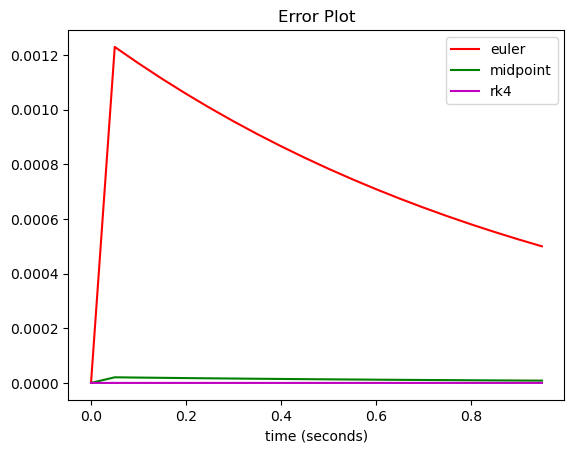

In [2]:
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.05,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)
timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
ye=[]
ym=[]
yrk=[]
y=coeff.yinitial
ye.append(coeff.yinitial)
ym.append(coeff.yinitial)
yrk.append(coeff.yinitial)
for i in np.arange(1,nsteps):
    ynew=eulerinter41(coeff,y,timeVec[i-1])
    ye.append(ynew)
    ynew=midpointinter41(coeff,y,timeVec[i-1])
    ym.append(ynew)
    ynew=rk4ODEinter41(coeff,y,timeVec[i-1])
    yrk.append(ynew)
    y=ynew
analytic=timeVec + np.exp(-timeVec)
theFig=plt.figure(0)
theFig.clf()
theAx=theFig.add_subplot(111)
#l1=theAx.plot(timeVec,analytic,'b-',label='analytic',linewidth=0.2)
theAx.set_xlabel('time (seconds)')
l2=theAx.plot(timeVec, np.abs(ye - analytic),'r-',label='euler')
l3=theAx.plot(timeVec, np.abs(ym - analytic),'g-',label='midpoint')
l4=theAx.plot(timeVec, np.abs(yrk - analytic),'m-',label='rk4')
theAx.legend(loc='best')
theAx.set_title('Error Plot');
#theAx.set_xlim(0.3, 0.35)
#theAx.set_ylim(1.02, 1.1)

3.  Again determine how the error changes relative to the change in
    stepsize, as the stepsize is halved.

From the log-log plot, we see that truncation error for euler is O(delta^2), midpoint is O(delta^3), while truncation error for RK4 is O(delta^4).

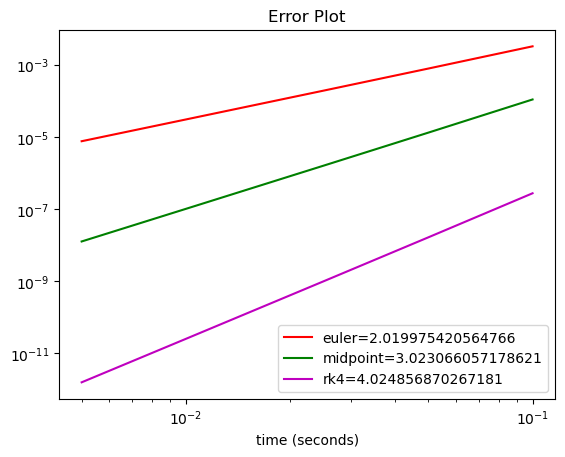

In [3]:
t_sample = 0.5
error_e = []
error_m = []
error_rk = []
dt_arr = np.array([0.1, 0.05, 0.025, 0.01, 0.005])
for dt in dt_arr:
    initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':dt,'c1':-1.,'c2':1.,'c3':1.}
    coeff = initinter41(initialVals)
    timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
    t_index = np.searchsorted(timeVec, t_sample)
    nsteps=len(timeVec)
    ye=[]
    ym=[]
    yrk=[]
    y=coeff.yinitial
    ye.append(coeff.yinitial)
    ym.append(coeff.yinitial)
    yrk.append(coeff.yinitial)
    for i in np.arange(1,nsteps):
        ynew=eulerinter41(coeff,y,timeVec[i-1])
        ye.append(ynew)
        ynew=midpointinter41(coeff,y,timeVec[i-1])
        ym.append(ynew)
        ynew=rk4ODEinter41(coeff,y,timeVec[i-1])
        yrk.append(ynew)
        y=ynew
    analytic=timeVec + np.exp(-timeVec)
    error_e.append( (ye - analytic)[t_index])
    error_m.append( (ym - analytic)[t_index])
    error_rk.append( (yrk - analytic)[t_index])

error_e = np.abs(np.array(error_e))
error_m = np.abs(np.array(error_m))
error_rk = np.abs(np.array(error_rk))
slope_e = linregress(np.log(dt_arr), np.log(error_e)).slope
slope_m = linregress(np.log(dt_arr), np.log(error_m)).slope
slope_rk = linregress(np.log(dt_arr), np.log(error_rk)).slope

theFig=plt.figure(0)
theFig.clf()
theAx=theFig.add_subplot(111)
#l1=theAx.plot(timeVec,analytic,'b-',label='analytic',linewidth=0.2)
theAx.set_xlabel('time (seconds)')
l2=theAx.loglog(dt_arr, error_e,'r-',label=f'euler={slope_e}')
l3=theAx.loglog(dt_arr, error_m,'g-',label=f'midpoint={slope_m}')
l4=theAx.loglog(dt_arr, error_rk,'m-',label=f'rk4={slope_rk}')
theAx.legend(loc='best')
theAx.set_title('Error Plot');
#theAx.set_xlim(0.3, 0.35)
#theAx.set_ylim(1.02, 1.1)

### ProblemCodingB

1.  Now solve the following test equation by both the midpoint and
    Heun’s method and compare. 
    
    $$f(y,t) = t - y  + 1.0$$ 
    
    Choose two sets of initial conditions and determine if there is any difference
    between the two methods when applied to this problem. Should there be? Explain by
    analyzing the steps that each method is taking.

In [4]:

def Heuninter41(coeff, y, theTime):
    k1 = coeff.dt * derivsinter41(coeff, y, theTime)
    k2 = coeff.dt * derivsinter41(coeff, y + (2/3)*k1, theTime + (2/3)*coeff.dt)
    y = y + 0.25*k1 + 0.75*k2
    return y
    

In [5]:
def script(yinitial, dt=0.25, t_beg=0, t_end=1):
    # Choice of initial conditions and time step
    yinitial = 1
    initialDict={'yinitial': yinitial,'t_beg':t_beg,'t_end':t_end,
                        'dt':dt,'c1':-1.,'c2':1.,'c3':1.}
    
    coeff = initinter41(initialDict)
    timeVec = np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
    nsteps=len(timeVec)
    yH = []
    ym = []
    yH0 = coeff.yinitial
    ym0 = coeff.yinitial
    yH.append(coeff.yinitial)
    ym.append(coeff.yinitial)
    for i in np.arange(1,nsteps):
        ynew=Heuninter41(coeff,yH0,timeVec[i-1])
        yH.append(ynew)
        yH0=ynew
        ynew=midpointinter41(coeff,ym0,timeVec[i-1])
        ym.append(ynew)
        ym0=ynew
    theFig,theAx=plt.subplots(1,1)
    analytic=timeVec + np.exp(-timeVec)
    l1=theAx.plot(timeVec,analytic,'b-',label='analytic',alpha=0.5, linewidth=0.5)
    theAx.set_xlabel('time (seconds)')
    l2=theAx.plot(timeVec,yH,'r-',label='Heun',alpha=0.5, linewidth=0.5)
    l3=theAx.plot(timeVec,ym,'g-',label='midpoint',alpha=0.5, linewidth=0.5)
    theAx.legend(loc='best')
    return theFig, theAx

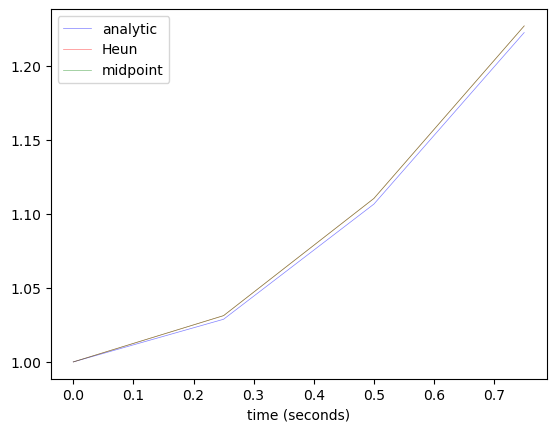

In [6]:
Fig, Ax = script(yinitial=1)

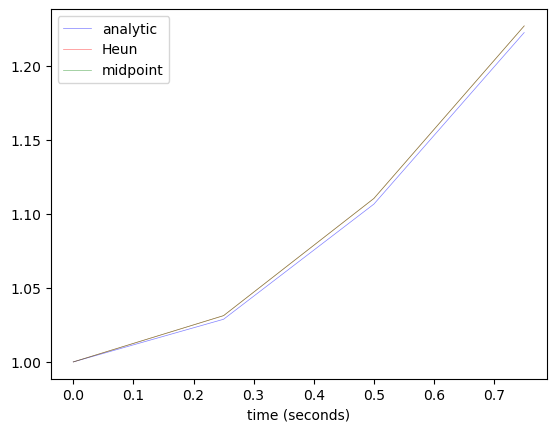

In [8]:
Fig, Ax = script(yinitial=5)

There is no difference between the two methods for different initial conditions. This is expected because when we solve the recurrence relations for midpoint and Heun's method with f(y, t) as defined above, it results in the same expression for $y_{n+1} = f(y_n)$.

Midpoint:
$$
  \begin{array}{l}
    k_1 =  h (t_n - y_n + 1)\\
    k_2 = h (t_n - y_n + 1) - \frac{1}{2}h^2(t_n - y_n)\\
    y_{n+1} = y_n + h (t_n - y_n + 1) - \frac{1}{2}h^2(t_n - y_n)
  \end{array}
$$

Heun:
$$
  \begin{array}{l}
    k_1 =  h (t_n - y_n + 1)\\
    k_2 = h (t_n - y_n + 1) - \frac{2}{3}h^2(t_n - y_n)\\
    y_{n+1} = y_n + \frac{1}{4}h (t_n - y_n + 1) + \frac{3}{4}h (t_n - y_n + 1) - \frac{3}{4}\times\frac{2}{3}h^2(t_n - y_n) \\ = y_n + h (t_n - y_n + 1) - \frac{1}{2}h^2(t_n - y_n)
  \end{array}
$$